In [13]:
import pandas as pd
import pandas_datareader.data as web
import baostock as bs
import numpy as np
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<div class="jumbotron">
    <p class="display-1 h1">金融交易基础</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 金融市场

> 从广义上而言，指的是能够进行证券交易的任何场所

- 金融市场有什么功能？

<center>
    
对比项目|商品市场|金融市场
:---:|:---|:---
价格发现|商品价格|证券价格
流动性|商品从生产者流动到消费者|从资金的持有者流动到资金的需求者
交易成本|降低销售以及购买商品的成本|降低资金交易的时间与成本
风险||风险共担

</center>

- 金融市场的类型

> - 债券市场
> - 股票市场
> - 外汇市场
> - 衍生品市场

## 债券市场与债券

> 定义：债券市场（或债务市场）是政府、企业和个人通过举债以实现融资目的的场所

+ 债券发行人（**债务人**）承诺在一定期限内定时支付给债券持有人（**债权人**）利息和本金

+ 债务人在债券市场上发行的证券，即为债券

<center>

<img src="./img/tradingBasics/bondexample.jpg" width=800>
    
</center>

- 票面价值(par value)：债务人承诺在债券到期时支付给债权人的金额。1000元
- 票面利率（coupon rate）：债券发行者每一年向投资者支付的利息占票面金额的比率。15%

- 债券价格与市场利率的关系

> **债券价格**与**市场利率**具有**反向变动**关系

$$p=\frac{C}{1+r}+\frac{C}{(1+r)^2}+\frac{C}{(1+r)^3}+\cdots+\frac{C+Par}{(1+r)^n}$$

其中，$p$是债券市场价格，$r$是市场利率，$C$是票面利率，$Par$是债券票面价值

## 股票市场与股票

> 定义：股票市场是代表所有者权益的普通股（或股票）交易的场所。

> 股票：表明持有者拥有发行企业一定比例资产和收益的有价证券

<center>

<img src="./img/tradingBasics/stockmarket.png" width=400>
    
</center>

- 一级市场（Primary market）
    + IPO(首次公开上市，Initial Public Offerings)
    + 一级市场的交易需要投资银行等帮助企业制定最初的发行价格，并把股票销售给**初始投资者**（initial investor)。

- 二级市场 （Secondary market）
    + 股票价格计算（估值）：现金流折现、市盈率
    + 量化交易实现选股、交易

<center>

<img src="./img/tradingBasics/stocks.png" width=1200>
    
</center>

<center>

<img src="./img/tradingBasics/sse.png" width=1000>
    
</center>

- 股票指数
    + SSE Composite Index (上证综指)
    + SZSE Component Index (深证成指)
    + CSI 300 Index (沪深300指数)

- 全球主要指数  <http://q.10jqka.com.cn/global/>

## 期货市场及期货

<dl class="row text-info">
    <dt class="col-md-2">期货合约</dt>
    <dd class="col-md-10">由期货交易场所统一制定的、规定在将来某一<strong>特定的时间</strong>和<strong>地点</strong>交割一定数量标的物的<strong>标准化合约</strong>。</dd>
</dl>

### 期货的特点

- 标准化合约
- 交易集中化
- 双向交易
- 杠杆机制
- 每日无负债结算制度 

#### 标准化合约

<center>

<img src="./img/tradingBasics/steamcoal.jpg" width=80%>
    
</center>

[动力煤货合约](http://www.czce.com.cn/cn/sspz/dlm/H770212index_1.htm)

- 交易单位：买入或卖出的数量必须是交易单位的**整数倍**

- 最小变动价位：期货交易时买卖双方报价所允许的最小变动幅度，每次报价时的价格变动必须时该最小变动价位的**整数倍**

#### 交易集中化

- 期货交易必须在**期货交易所**内开展

- 场内交易(exchange traded)

#### 双向交易

- 既可以**买入**开仓，也可以**卖出**开仓

- 可以实现对冲（hedge）策略

#### 杠杆机制

<dl class="row text-danger">
    <dt class="col-md-3">交易保证金</dt>
    <dd class="col-md-9">
        <p>交易双方向交易所缴纳的、用于履约担保的资金。</p>
        <p>一般是合约金额的5% ∼ 10%。</p>
    </dd>
</dl>

- 例如，买（卖）1手动力煤期货合约，交易单位100吨/手，报价1000元/吨，保证金是5%

- 以少量的资金控制期货合约，实现以小博大

#### 每日无负债结算

- 每日收盘后，会员的保证金账户会依据持仓合约数量和期货合约的结算价进行调整，以反映该会员的盈利或亏损

- 也被称作“逐日盯市”（marked-to-market）

日期|结算价|A账户|B账户
---|---|:---|:---
1|2488元/吨|**卖出**10手rb合约，保证金12440元|**买入**10手rb合约，保证金12440元
2|2500元/吨|保证金12500元，追缴<font color="red">1200元</font>$+$<font color="red">60元</font>|清退$-$<font color="green">1200元</font>$+$<font color="red">60元</font>
3|2470元/吨|保证金12350元，清退$-$<font color="green">3000元</font>$-$<font color="green">150元</font>|保证金12350元，追缴<font color="red">3000元</font>$-$<font color="green">150元</font>
4|2451元/吨|保证金12225元，清退$-$<font color="green">1900元</font>$-$<font color="green">95元</font>|保证金12225元，追缴<font color="red">1900元</font>$-$<font color="green">95元</font>

日期|结算价|A账户|B账户
:---:|:---:|:---:|:---:
1|1200元/吨|**卖出**1手ZC合约，保证金6000元|**买入**1手ZC合约，保证金6000元
2|1500元/吨|保证金7500元，追缴<font color="red">30000元</font>$+$<font color="red">1500元</font>|清退$-$<font color="green">30000元</font>$+$<font color="red">1500元</font>
3|1400元/吨|保证金7000元，清退$-$<font color="green">10000元</font>$-$<font color="green">500元</font>|保证金7000元，追缴<font color="red">10000元</font>$-$<font color="green">500元</font>
4|1250元/吨|保证金6250元，清退$-$<font color="green">15000元</font>$-$<font color="green">750元</font>|保证金6250元，追缴<font color="red">15000元</font>$-$<font color="green">750元</font>

比较项目|股票|期货
:---:|:---:|:---:
操作方向|做多|做多+**做空**
总利益|非零和博弈|**零和**博弈
风险|有风险|高风险

## 期权

<dl class="row">
    <dt class="col-md-3">期权（Options）</dt>
    <dd class="col-md-9">一种给予买入者（或期权持有人）在某个<strong>指定日期（或之前）</strong>以一个<strong>指定的价格</strong>(行权价格)买入或卖出标的资产的<strong>权利</strong>，而不是义务的合约。</dd>
</dl>

- 期权的类型
    - 看涨期权（call option）
    - 看跌期权（put option）

- 期权的交易类型
    - **买入看涨**期权
    - **卖出看涨**期权
    - **买入看跌**期权
    - **卖出看跌**期权

### 期权与期货

比较项目|期货|期权
:---:|:---:|:---:
持有者责任|义务|权利
费用|保证金|期权费用（option premium）

### 期权示例

#### 买入股票

<center><img src="./img/tradingBasics/longStock.png" width=50%></center>

- 买入股票，盈利水平与股价成线性关系

#### 买入看涨期权

<center><img src="./img/tradingBasics/longCall.jpg" width=50%></center>

- 当股价低于40的时候买方不行权，买方亏损为购买期权手续费1.5

- 当股价高于41.5的时候买方可以行权，买方盈利为 $(\text{股价}-40)-1.5$

- 盈利水平与股价成非线性关系

- 风险可控，收益**无限**

#### 卖出看涨期权

<center><img src="./img/tradingBasics/shortCall.jpg" width=50%></center>

- 当股价低于40的时候，买方不会行权，卖方盈利为期权手续费1.5

- 当股价高于41.5的时候，买方会行权，卖方的亏算为 $1.5-(\text{股价}-40)$

- 收益有限，但风险**无限**

## 外汇市场与外汇 

- 外汇市场是国际货币汇率产生和国际货币交易的场所。

<dl class="row">
    <dt class="col-md-2">外汇</dt>
    <dd class="col-md-10">外国货币或者以外国货币表示的能用于国际结算的支付手段。</dd>
</dl>

- 主要外汇品种：美元（USD）、欧元(EUR)、日元(JPY)、英镑(GBP)、瑞士法郎(CHF)、加元(CAD)、澳元(AUD)

<center>

<img src="./img/tradingBasics/forexfuturesstocks.png" width=600>
    
</center>

## 交易所与电子交易

- 专门进行金融标的物买卖的场所

<center>

<img src="./img/tradingBasics/nyse.jpg" width=600>
    
</center>

+ 为方便经纪人进行撮合，形式为喊话与电话交易

<center>

<img src="./img/tradingBasics/nasdaq.jpg" width=600>
    
</center>

+ 电子化交易

### 交易所的功能

- 交易撮合
- 制定交易规章制度
- 监督管理交易过程
- 提供量化交易接口，如CTP（综合交易平台）等

### 我国主要交易所

#### 股票交易所

- 上海证券交易所（SSE）
    - 1990年成立于上海浦东新区
    - 股票交易主要集中在**主板**
    - 以央企、国企股票为主

- 深圳证券交易所（SZSE）
    - 1990年成立于深圳福田区
    - 股票交易集中在**主板**、**中小企业板**、**创业板**

- 交易时间
    - 上午：9:30$\sim$11:30
    - 下午：13:00$\sim$15:00

#### 期货交易所

<center><img src="./img/tradingBasics/exchange.png" width=60%></center>

- 交易时间
    - 上午：9:00$\sim$11:30 (股指期货9:30$\sim$11:30,国债期货9:15$\sim$11:30)
    - 下午：13:30$\sim$15:00（股指期货13:00$\sim$15:00,国债期货13:00$\sim$15:15）
    - 晚上: 21:00$\sim$23:00（铜、铝、铅、锌、镍、锡21:00$\sim$01:00，黄金、白银21:00$\sim$02:30）

# 交易的基本概念——以期货交易为例

## 交易操作

<dl class="row text-info">
    <dt class="col-md-2">开仓</dt>
    <dd class="col-md-10">交易者<strong>新</strong>买入或<strong>新</strong>卖出一定数量的期货合约</dd>
</dl>

- 例如，以1000元/吨的价格在期货市场上卖出10手ZC201合约

<dl class="row text-danger">
    <dt class="col-md-2">平仓</dt>
    <dd class="col-md-10">交易者通过<strong>笔数相等</strong>、<strong>方向相反</strong>的期货交易来对冲原来持有的期货合约的过程</dd>
</dl>

- 以1000元/吨的价格在期货市场上卖出10手ZC201合约，则须在2022年1月之前**买进10手**该月份合约对冲平仓

<dl class="row">
    <dt class="col-md-2">持仓</dt>
    <dd class="col-md-10">开仓之后尚没有平仓的合约，是交易者持有期货合约的过程</dd>
</dl>

- 多头头寸：**买入**期货合约后持有的头寸，也被称为***多头***

- 空头头寸：**卖出**期货合约后持有的头寸，也被称为***空头***

## 交易量

<dl class="row text-info">
    <dt class="col-md-2">成交量</dt>
    <dd class="col-md-10">在一个交易时段内买卖某个期货合约的数量</dd>
</dl>

<dl class="row text-danger">
    <dt class="col-md-2">持仓量</dt>
    <dd class="col-md-10">所有投资者持仓合约的总数，是所有多头与空头数之和</dd>
</dl>

## 价格

### 形态描述类价格

- 开盘价：某一期货合约在某一时间段内**第一笔**成交的价格
- 收盘价：某一期货合约在某一时间段内**最后一笔**成交的价格
- 最高价：某一期货合约在某一时间段内成交的**最高**价格
- 最低价：某一期货合约在某一时间段内成交的**最低**价格

#### 时间长度

- 不同的时间长度对应着不同长度的趋势
    - 例如，1分钟、5分钟、15分钟、1小时、1天、1周、1月、半年、1年等

<center><img src="./img/tradingBasics/timescale.jpg" width=100%></center>

#### K线图(candlestick)

- 选取一个时间长度，然后用该时间长度内的**开盘价、收盘价、最高价、最低价**构成的图形

<center><img src="./img/tradingBasics/candlestick.png" width=70%></center>

#### `Python`绘制K线图

##### 获取数据

###### 利用pandas-datareader获取数据

安装

```python
pip install pandas
pip install pandas-datareader
```

使用说明

[https://pydata.github.io/pandas-datareader/readers/index.html](https://pydata.github.io/pandas-datareader/readers/index.html)

```python
import pandas_datareader.data as web
web.DataReader(symbols=None,data_source=None, start=None,end=None,freq='d')
```
- `symbols`：标的物代码，字符串
- `data_source`：数据源，字符串，例如'stooq'、'yahoo'等
- `start`：起始日期，字符串，格式'2021-09-15'
- `end`：结束日期，字符串
- `freq`：频率，字符串，d, w, m ,q, y 对应日、周、月、季度、年
- 返回`dataframe`格式数据

In [10]:
aprice = web.DataReader('AAPL',data_source='stooq',start='2021-01-01',end='2021-09-30')
aprice.head()
aprice.shape

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-30,143.66,144.3780,141.28,141.50,89056664
2021-09-29,142.47,144.4500,142.03,142.83,74602044
2021-09-28,143.25,144.7500,141.69,141.91,108972340
2021-09-27,145.47,145.9600,143.82,145.37,74150729
2021-09-24,145.66,147.4701,145.56,146.92,53477869


(188, 5)

In [12]:
# 按时间升序排列
aprice.sort_index(inplace=True)
aprice

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.89,132.9800,126.17,128.81,143975186
2021-01-05,128.29,131.1200,127.83,130.39,98123773
2021-01-06,127.12,130.4300,125.79,126.01,155816646
2021-01-07,127.76,131.0100,127.26,130.30,110093006
2021-01-08,131.81,132.0100,129.63,131.43,105652328
...,...,...,...,...,...
2021-09-24,145.66,147.4701,145.56,146.92,53477869
2021-09-27,145.47,145.9600,143.82,145.37,74150729
2021-09-28,143.25,144.7500,141.69,141.91,108972340


###### 利用baostock获取数据

安装

```python
    pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn
```

使用说明

[https://baostock.com/baostock/index.php](https://baostock.com/baostock/index.php)

导入

```python
    import baostock as bs
```

In [14]:
# 登录系统
lg = bs.login()

login success!


获取A股历史K线数据

``` python
query_history_k_data_plus(code, fields, start, end, frequency, adjustflag)
```

- `code`：股票代码，sh或sz.+6位数字代码，例如sh.601398
- `fields`：查询指标，字符串，多个指标之间用**英文逗号间隔**

参数名称|参数描述|说明
---|---|---
date|交易所行情日期|格式：YYYY-MM-DD
code|证券代码|格式：sh.600000。sh：上海，sz：深圳
open|今开盘价格|精度：小数点后4位；单位：人民币元
high|最高价|精度：小数点后4位；单位：人民币元
low|最低价|精度：小数点后4位；单位：人民币元
close|今收盘价|精度：小数点后4位；单位：人民币元
preclose|昨日收盘价|精度：小数点后4位；单位：人民币元
volume|成交数量|单位：股
amount|成交金额|精度：小数点后4位；单位：人民币元
adjustflag|复权状态|不复权、前复权、后复权

- `start`：开始日期（包含），格式“YYYY-MM-DD”，为空时取2015-01-01
- `end`：结束日期（包含），格式“YYYY-MM-DD”，为空时取最近一个交易日
- `frequency`：数据频率，字符串

取值|含义
---|---
d|日k线
w|周k线
m|月k线
5|5分钟k线
15|15分钟k线
30|30分钟k线
60|60分钟k线

- `adjustflag`：复权类型，字符串

取值|含义
---|---
3|不复权，默认值
1|后复权
2|前复权

输出结果

- `bs.query_history_k_data_plus()`返回的是一个迭代对象（`iterator`）
- 能够获取1990-12-19至当前时间的数据

```python
rs = bs.query_history_k_data_plus('sh.600000', 'date,open,high,low,close,preclose,volume,adjustflag',start_date='2021-01-01',end_date='2021-09-30',frequency='d',adjustflag='3')
while rs.error_code =='0' and rs.next():
    print(rs.get_row_data())
```

- `error_code`：返回对象的属性，读取数据是否有错误
- `next()`：返回对象的方法，判断读取的数据是否还有下一条，取值是`True`或`False`
- `get_row_data()`：返回对象的方法，获取一条记录

In [16]:
rs = bs.query_history_k_data_plus('sh.600000', 'date,open,high,low,close,preclose,volume,adjustflag',start_date='2021-01-01',end_date='2021-09-30',frequency='d',adjustflag='3')

# 创立存储结果的列表
rsLst = []

# 读取k线数据，存储到rsLst中
while rs.error_code == '0' and rs.next():
    rsLst.append(rs.get_row_data())
    
# 将列表转换成pandas的dataframe
rsDf = pd.DataFrame(rsLst, columns=rs.fields)

rsDf

,date,open,high,low,close,preclose,volume,adjustflag
0,2021-01-04,9.6400,9.7300,9.5500,9.6900,9.6800,62906939,3
1,2021-01-05,9.6800,9.6800,9.5200,9.6800,9.6900,53859177,3
2,2021-01-06,9.6200,9.8300,9.6200,9.8200,9.6800,61881321,3
3,2021-01-07,9.8300,9.9300,9.6600,9.8100,9.8200,57090442,3
4,2021-01-08,9.8300,9.9000,9.7300,9.8300,9.8100,55801455,3
...,...,...,...,...,...,...,...,...
177,2021-09-24,9.0400,9.0800,8.9900,9.0200,9.0300,39925596,3
178,2021-09-27,9.0200,9.0500,8.9400,9.0200,9.0200,41708355,3
179,2021-09-28,8.9800,9.0900,8.9800,9.0300,9.0200,33340762,3
180,2021-09-29,9.0100,9.0900,8.9700,9.0200,9.0300,40008268,3


##### 绘制K线

```python
pip install mplfinance
```

[https://github.com/matplotlib/mplfinance](https://github.com/matplotlib/mplfinance)

```python
import mplfinance as mpf
mpf.plot(ohlc,type='ohlc',style='default',mav=(),volume=False,figratio=(),figscale=1)
```
- `ohlc`：包含开盘价、最高价、最低价、收盘价的`DataFrame`
- `type`：形状，可以取值`ohlc`,`candle`,`line`,`renko`,或`pnf`
- `style`：样式，可以取值`default`,`blueskies`,`brasil`,`charles`,`checkers`,`classic`,`mike`,`nightclouds`,`sas`,`starsandstripes`,`yahoo`
- `mav`：均线，元组类型
- `volume`：是否绘制成交量，默认不绘制
- `figratio`：绘图的长宽比，元组类型
- `figscale`：绘图放大比例，float类型

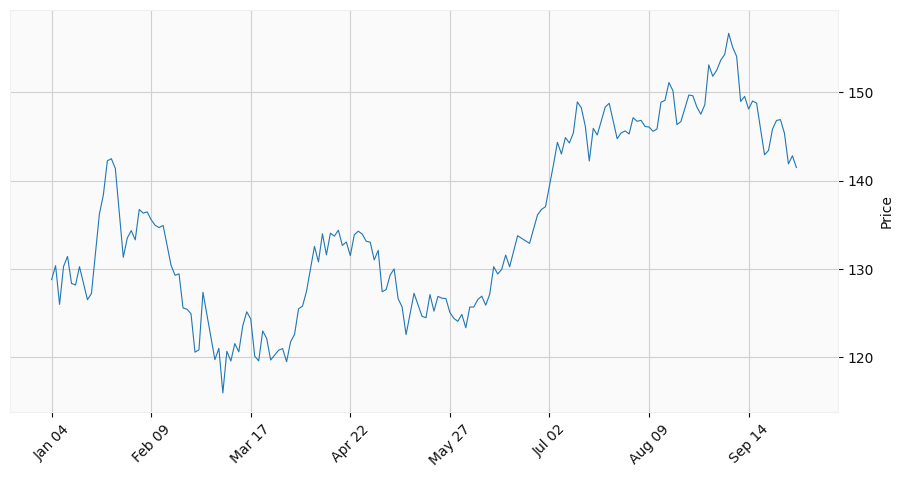

In [18]:
mpf.plot(aprice,type='line',style='yahoo',volume=False,figratio=(12,6),figscale=1)

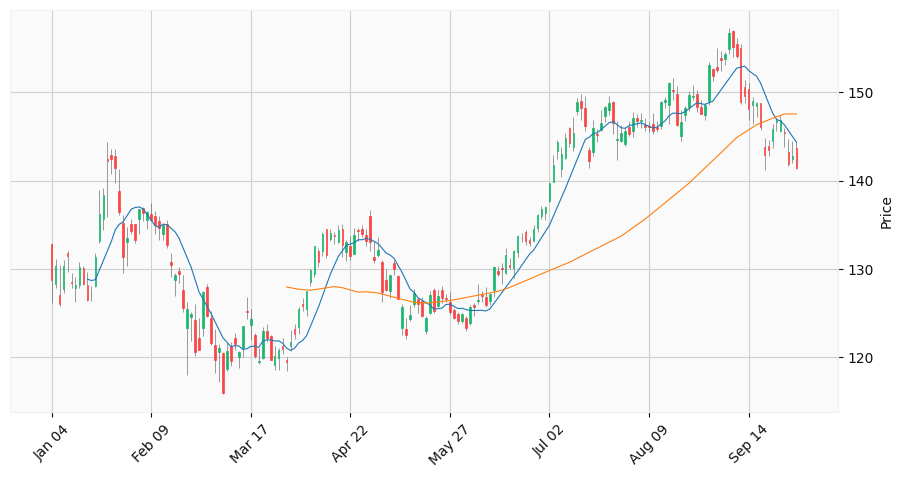

In [19]:
mpf.plot(aprice,type='candle',style='yahoo',volume=False,figratio=(12,6),figscale=1,mav=(10,60))

绘制浦发银行（sh.600000）的日k线

In [20]:
mpf.plot(rsDf,type='candle',style='yahoo',volume=True,figratio=(12,6),figscale=1,mav=(5,30))

TypeError: Expect data.index as DatetimeIndex

In [23]:
# 把日期变成时间格式
rsDf['date'] = pd.to_datetime(rsDf['date'])
rsDf.dtypes

date          datetime64[ns]
open                  object
high                  object
low                   object
close                 object
preclose              object
volume                object
adjustflag            object
dtype: object

In [24]:
# 将日期列设为dataframe的index
rsDf.set_index('date',inplace=True)
rsDf.head()

,open,high,low,close,preclose,volume,adjustflag
date,,,,,,,
2021-01-04,9.6400,9.7300,9.5500,9.6900,9.6800,62906939,3
2021-01-05,9.6800,9.6800,9.5200,9.6800,9.6900,53859177,3
2021-01-06,9.6200,9.8300,9.6200,9.8200,9.6800,61881321,3
2021-01-07,9.8300,9.9300,9.6600,9.8100,9.8200,57090442,3
2021-01-08,9.8300,9.9000,9.7300,9.8300,9.8100,55801455,3


In [31]:
# 将其他列改变成float类型
for each in rsDf.columns:
    if rsDf[each].dtypes == 'O':
        rsDf[each] = rsDf[each].astype('float')
rsDf.dtypes

open          float64
high          float64
low           float64
close         float64
preclose      float64
volume        float64
adjustflag    float64
dtype: object

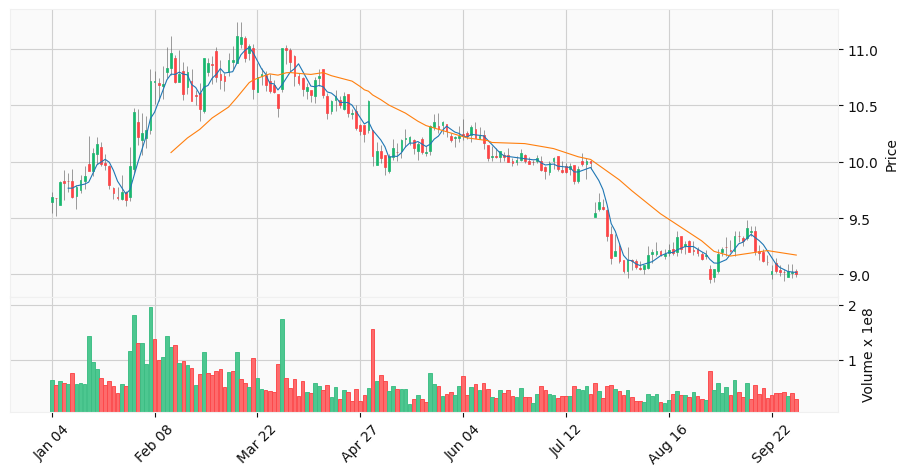

In [33]:
mpf.plot(rsDf,type='candle',style='yahoo',volume=True,figratio=(12,6),figscale=1,mav=(5,30))

###### 改成红涨绿跌

```python
创建k线图颜色对象
mc = mpf.make_marketcolors(up='r',down='g',inherit=True)  # inherit=True 其他颜色与up和down对应


更新k线图样式
s = mpf.make_mpf_style(marketcolors=mc)
```

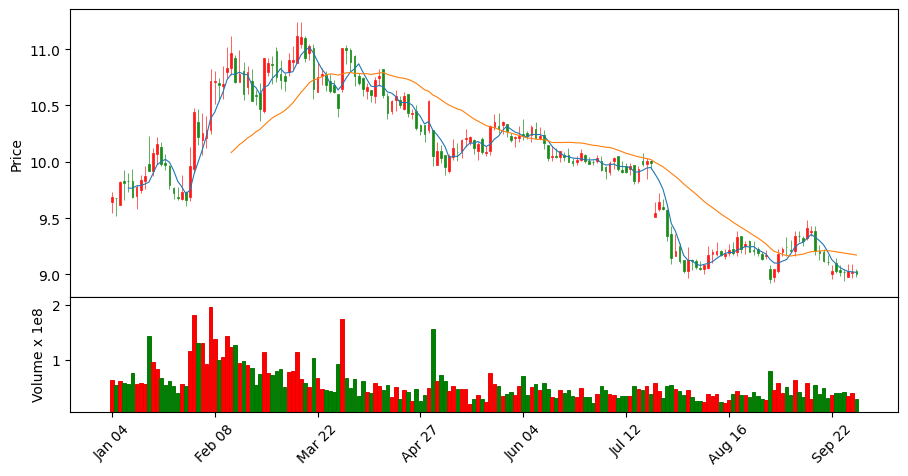

In [38]:
mc = mpf.make_marketcolors(up='r',down='g',inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(rsDf,type='candle',style=s,volume=True,figratio=(12,6),figscale=1,mav=(5,30))

##### 绘制日内交易数据

###### 读取日内数据

```python
pd.read_csv('path_to_file.csv')
```
- `'path_to_file.csv`：要打开的`.csv`文件的完整路径
- 返回`DataFrame`对象

In [40]:
intraday = pd.read_csv('./data/tradingBasics/rb2010.csv')
intraday.head()
intraday.shape

,Date,Open,High,Low,Close,Volume
0,2020-08-07 09:01,3849.0,3860.0,3849.0,3859.0,16100
1,2020-08-07 09:02,3858.0,3861.0,3857.0,3857.0,4654
2,2020-08-07 09:03,3858.0,3861.0,3857.0,3859.0,6055
3,2020-08-07 09:04,3860.0,3861.0,3857.0,3858.0,3773
4,2020-08-07 09:05,3858.0,3859.0,3857.0,3857.0,1718


(135, 6)

###### 设定日期索引

In [41]:
intraday['Date'] = pd.to_datetime(intraday['Date'])
intraday.set_index('Date',inplace=True)
intraday.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-07 09:01:00,3849.0,3860.0,3849.0,3859.0,16100
2020-08-07 09:02:00,3858.0,3861.0,3857.0,3857.0,4654
2020-08-07 09:03:00,3858.0,3861.0,3857.0,3859.0,6055
2020-08-07 09:04:00,3860.0,3861.0,3857.0,3858.0,3773
2020-08-07 09:05:00,3858.0,3859.0,3857.0,3857.0,1718


###### 绘制分钟K线图

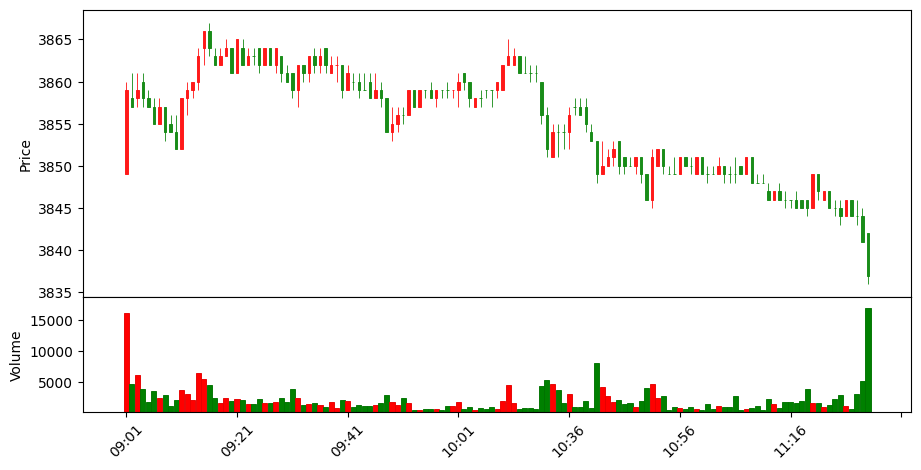

In [42]:
mpf.plot(intraday,type='candle',style=s,volume=True,figratio=(12,6),figscale=1)

### 结算类价格

<dl class="row">
    <dt class="col-md-2">结算价</dt>
    <dd class="col-md-10">某一期货合约当天的成交价格按照<strong>成交量</strong>的<strong>加权平均</strong>。</dd>
</dl>

- 用来计算保证金账户每天盈亏的价格

### 交易类价格

- Ask：卖价
- Bid：买价

<div align="center">
    <img src="./img/tradingBasics/askbid.png" width=200>
</div>

## 交易指令

- 在委托单上注明：投资者名称、投资者编码、投资者产品名称、合约到期月份、开仓或平仓的数量、买卖价格、执行方式、下单时间、投资者签名

### 市价委托单

- 投资者在提交委托单时只规定数量而不规定价格，经纪商在接到该市价委托单后应以最快的速度，并尽可能以当时市场上最好的价格执行该委托单

- 市价**买进**委托单：以当时市场上**最低**的卖价成交
- 市价**卖出**委托单：以当时市场上**最高**的买价成交

- 特点：能够确保成交，单不能保证成交价格

### 限价委托单

- 下单时不仅规定数量，而且规定价格

> 例如，卖出限价为3500元/吨的rb2005螺纹钢10手

- 限价买进委托单：买入成交价应**不高于**指定的限价
- 限价卖出委托单：卖出成交价应**不低于**指定的限价

- 特点：不能确保成交，但是一旦成交能够保证成交价格

### 止损委托单

- 在委托单中设置一个触发价格，当市场价格上升或者下降到该触发价格的时候，止损委托单被激活，转化成市价委托单

- 多头：当市场价格等于或低于指定的止损价格，则执行市价卖出委托单
- 空头：当市场价格等于或高于指定的止损价格，则执行市价买进委托单